In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\prady\\OneDrive\\Desktop\\african_crises.csv") # importing data

In [3]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [5]:
# Doing label encoding to the banking_crisis feature as it is a categorical variable

data['banking_crisis'] = labelencoder.fit_transform(data['banking_crisis']) 

In [6]:
corrdata = data[['systemic_crisis','currency_crises','inflation_crises','banking_crisis']]

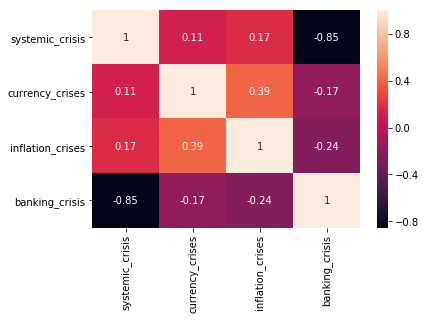

In [7]:
## 1. Are there any correlations among systemic_crisis, currency_crises, inflation_crises and banking_crisis ?
sns.heatmap(corrdata.corr(),annot=True)
# This heatmap gives us the correlations between the required data.

# Alternatively we could also directly calculate the correlations between the data using point biserial correlation 
# present in scipy.stats library

In [8]:
# from the correlation plot we could see that there is a strong negative correlation of 0.85 between systemic_crisis
# and banking_crisis.

# There is a slight positive correlation of 0.39 between currency_crises and inflation_crises

# There is not much correlations between the remaining variable pairs and the correlations could be viewed from the heatmap.

In [9]:
## 2. Is there any relation between yearly change in exch_usd and inflation_annual_cpi?


In [10]:
required = data[['exch_usd','inflation_annual_cpi']]
required.corr(method='pearson')

,exch_usd,inflation_annual_cpi
exch_usd,1.000000,-0.011947
inflation_annual_cpi,-0.011947,1.000000


In [11]:
# exch_usd and inflation_annual_cpi has a negative correlation of -0.011947.

In [12]:
## 3. Which country has most stable exchange rate over the years?

stabledata = data[['country','year','exch_usd','inflation_annual_cpi']]

In [13]:
stabledata.groupby(['country']).exch_usd.var() 

country
Algeria                       865.158479
Angola                       1049.574251
Central African Republic    21821.299240
Egypt                           2.978427
Ivory Coast                 34563.267148
Kenya                         934.769285
Mauritius                     103.467011
Morocco                         8.535214
Nigeria                      3490.149060
South Africa                    7.187258
Tunisia                     12208.309916
Zambia                          3.674024
Zimbabwe                     7023.383637
Name: exch_usd, dtype: float64

In [14]:
# By observing the variances we could observe that Egypt has least variance depicting more stability.

# Therefore, Ivory coast has more stable exch_usd (exchange rate) over the years.

In [15]:
## 4. Which country has most stable inflation_annual_cpi over the years?

stabledata.groupby(['country']).inflation_annual_cpi.var()

country
Algeria                     2.061941e+02
Angola                      3.392400e+05
Central African Republic    4.887568e+01
Egypt                       9.614490e+01
Ivory Coast                 4.355069e+01
Kenya                       6.097410e+01
Mauritius                   5.814585e+01
Morocco                     1.499700e+02
Nigeria                     2.450365e+02
South Africa                4.377161e+01
Tunisia                     2.168103e+02
Zambia                      1.247473e+03
Zimbabwe                    5.372407e+12
Name: inflation_annual_cpi, dtype: float64

In [16]:
# By observing the variances we could observe that Ivory Coast has least variance depicting more stability.

# Therefore, Ivory coast has more stable inflation_annual_cpi over the years.

In [17]:
## 5. Does gaining independence has any effects on exch_usd and inflation_annual_cpi ?

required = data[['exch_usd','inflation_annual_cpi','independence']]

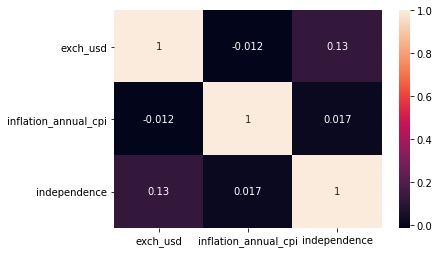

In [18]:
sns.heatmap(required.corr(),annot=True)

In [19]:
# Independence has a minor effect with a correlation of 0.13 on exch_usd and much negligible effect
# on inflation_annual_cpi with a correlation of 0.017. 

# So, gaining independence has very less effect on exch_usd and inflation_annual_cpi.